In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle


In [2]:
with open("model.pkl", 'rb') as file:
    model = pickle.load(file)


In [30]:
with open("vectorizer.pkl", 'rb') as file:
    vectorizer_clf = pickle.load(file)


In [4]:
df = pd.read_csv('processed_emails.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11300 entries, 0 to 11299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          11300 non-null  object
 1   spam          11300 non-null  int64 
 2   email_length  11300 non-null  int64 
 3   text_prepr    11288 non-null  object
dtypes: int64(2), object(2)
memory usage: 353.2+ KB


In [6]:
df

,text,spam,email_length,text_prepr
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cds software compat...
...,...,...,...,...
11295,This is the 2nd time we have tried 2 contact u...,1,160,time tried contact u pound prize claim easy ca...
11296,Will ü b going to esplanade fr home?,0,36,ü b going esplanade fr home
11297,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestions
11298,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


In [7]:
df['text_prepr'].dropna('', inplace=True)

C:\Users\Fgonz\AppData\Local\Temp\ipykernel_14172\2889498028.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  df['text_prepr'].dropna('', inplace=True)


In [8]:
df_no_spam=df[df["spam"]==0]


In [9]:
df_no_spam.dropna(subset="text_prepr", inplace=True)

C:\Users\Fgonz\AppData\Local\Temp\ipykernel_14172\1258488278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_spam.dropna(subset="text_prepr", inplace=True)


In [10]:
vectorizer_kmeans = TfidfVectorizer()
X = vectorizer_kmeans.fit_transform(df_no_spam['text_prepr'])

In [27]:
vectorizer_kmeans.get_feature_names()

C:\Users\Fgonz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaenerfax',
 'aadedeji',
 'aagrawal',
 'aah',
 'aaldous',
 'aanalysis',
 'aaniye',
 'aaooooright',
 'aaron',
 'aathi',
 'ab',
 'abacus',
 'abahy',
 'abandon',
 'abandoned',
 'abandonment',
 'abarr',
 'abb',
 'abbey',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abc',
 'abdelnour',
 'abdomen',
 'abdul',
 'abdullah',
 'abeg',
 'abel',
 'abello',
 'abernathy',
 'abetted',
 'abeyance',
 'abhay',
 'abi',
 'abide',
 'abilities',
 'ability',
 'abiola',
 'abitibi',
 'abj',
 'abklaeren',
 'abl',
 'able',
 'abler',
 'abliged',
 'ablx',
 'abn',
 'abnormal',
 'abnormally',
 'aboard',
 'abolish',
 'abook',
 'aboriginal',
 'abormalities',
 'abort',
 'aboutas',
 'abouts',
 'abovenet',
 'abr',
 'abraham',
 'abramowicz',
 'abrams',
 'abrasive',
 'abreast',
 'abreo',
 'abridged',
 'abroad',
 'abs',
 'absence',
 'absense',
 'absent',
 'absolute',
 'absolutely',
 'absolutly',
 'absolved',
 'absorb',
 'absorbing',
 'absorbowac',
 'absorbs',
 'absorption',
 'absoutely',
 'abstained',
 'ab

In [11]:
# SSE = []
# for cluster in range(1,10):
#     kmeans = KMeans(n_clusters = cluster, random_state=0)
#     kmeans.fit(X)
#     SSE.append(kmeans.inertia_)

In [12]:
# plt.plot(range(1,10),SSE)
# plt.title('Método del codo')
# plt.xlabel('Número de clusters')
# plt.ylabel('SSE')
# plt.show()

In [13]:
def hacer_clustering(dataframe, n_clusters):
    dataframe = dataframe[dataframe['spam'] == 0].dropna(subset=['text_prepr'])
    
    mensajes_no_spam = dataframe['text_prepr']
    
    X = vectorizer_kmeans.fit_transform(mensajes_no_spam)
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    grupos = kmeans.predict(X)
    serie_grupos = pd.Series(grupos, name='group', index=mensajes_no_spam.index)
    
    return dataframe.assign(group=serie_grupos), kmeans

In [14]:
df

,text,spam,email_length,text_prepr
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cds software compat...
...,...,...,...,...
11295,This is the 2nd time we have tried 2 contact u...,1,160,time tried contact u pound prize claim easy ca...
11296,Will ü b going to esplanade fr home?,0,36,ü b going esplanade fr home
11297,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestions
11298,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


In [15]:
df_grupos0, kmeans=hacer_clustering(df,5)

In [16]:
df_grupos1=df_grupos0.dropna(subset="group", inplace=False)

In [17]:
df_grupos1

,text,spam,email_length,text_prepr,group
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188,subject hello guys bugging completed questionn...,2
1369,Subject: sacramento weather station fyi - - ...,0,1997,subject sacramento weather station fyi forward...,4
1370,Subject: from the enron india newsdesk - jan 1...,0,7902,subject enron india newsdesk jan th newsclips ...,2
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644,subject powerisk invitation angelika thanks in...,2
1372,Subject: re : resco database and customer capt...,0,5535,subject resco database customer capture steve ...,2
...,...,...,...,...,...
11293,Huh y lei...,0,12,huh lei,0
11296,Will ü b going to esplanade fr home?,0,36,ü b going esplanade fr home,0
11297,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestions,0
11298,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...,0


In [18]:
def hacer_wordcloud(dataframe, n_clusters):
    for i in range(n_clusters):
        messages_group = dataframe[dataframe['group'] == i]['text_prepr'].str.cat(sep=' ')
        
        wordcloud = WordCloud(width=400, height=400, min_font_size=10).generate(messages_group)
        
        plt.figure(figsize=(4, 4), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        
        plt.show()
        

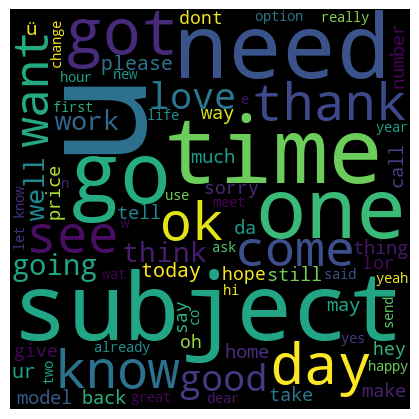

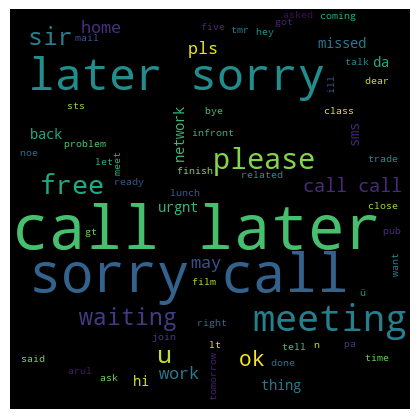

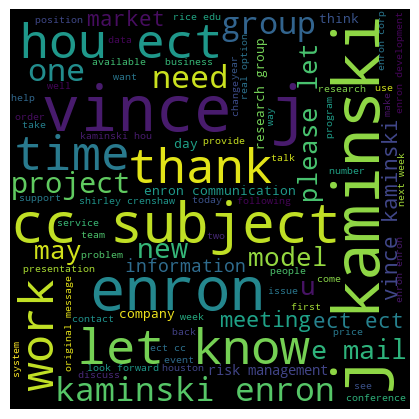

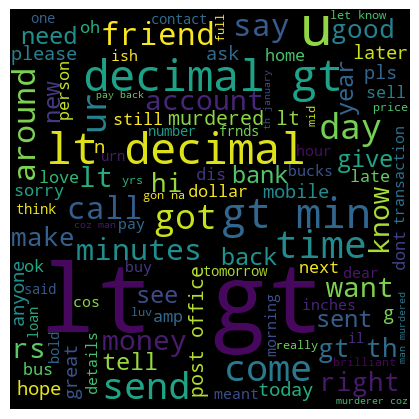

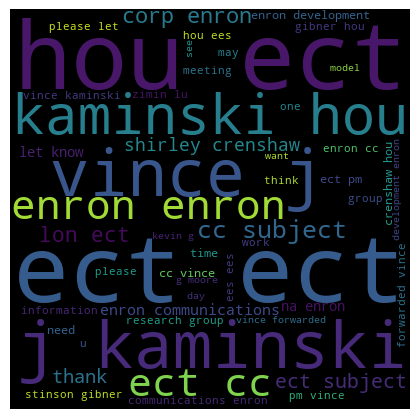

In [19]:
hacer_wordcloud(df_grupos1,5)

In [20]:
def predecir_grupo_spam(mensaje, vectorizer_clf, vectorizer_kmeans, kmeans, model):
    # Predecir la probabilidad de que sea spam
    X_spam = vectorizer_clf.transform([mensaje])
    y_pred_spam = model.predict(X_spam)
    if y_pred_spam[0] > 0.5:
        return 'Spam'
    else:
        # Predecir al grupo al que pertenece
#         Cargar vectorizer_kmeans
        
        mensaje_vect = vectorizer_kmeans.transform([mensaje])
        label = kmeans.predict(mensaje_vect)[0]
        return 'No es spam, pertenece al grupo: {}'.format(label)

In [31]:
mensaje = input("Introduce el mensaje: ")
print(predecir_grupo_spam(mensaje, vectorizer_clf, vectorizer_kmeans, kmeans, model))


Introduce el mensaje: hola


NotFittedError: The TF-IDF vectorizer is not fitted